<a href="https://colab.research.google.com/github/katevzadze/first_ML/blob/main/My_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML #4 "Создание и обучение первой нейронной сети"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import random
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import pathlib
from typing import List, Tuple, Union

2) Загрузка и извлечение датасета

In [ ]:
dataset_url: str = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir: pathlib.Path = pathlib.Path(tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)).with_suffix('')

228813984/228813984 [==============================] - 9s 0us/step


3) Проверка датасета

In [ ]:
image_count: int = len(list(dataset_dir.glob("*/*.jpg")))
print(image_count)

3670


4) Подготовка данных и модели

In [ ]:
batch_size = 32
img_width = 180
img_height = 180
random_seed = random.randint(0,9999)

def create_image_dataset(
    dataset_dir: pathlib.Path,
    subset: str,
    image_size: tuple[int,int],
    batch_size: int
) -> tf.data.Dataset:
  return tf.keras.utils.image_dataset_from_directory(
      dataset_dir,
      validation_split = 0.2,
      subset = subset,
      seed = random_seed,
      image_size = image_size,
      batch_size = batch_size
  )
train_ds_original: tf.data.Dataset = create_image_dataset(dataset_dir,"training",(img_height,img_width),batch_size)
val_ds_original: tf.data.Dataset = create_image_dataset(dataset_dir,"validation",(img_height,img_width),batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


5) Подготовка данных с кэшированием и предварительной загрузкой

In [ ]:
class_names: list[str] = train_ds_original.class_names
print(f"Class names: {class_names}")
AUTOTUNE: int = tf.data.AUTOTUNE
train_ds = train_ds_original.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds_original.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


6) Создание модели нейронной сети

In [ ]:
num_classes: int = len(class_names)
model: keras.Sequential = Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

7) Компиляция модели

In [ ]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

8) Обучение модели

In [ ]:
epochs: int = 10
history: keras.callbacks.History = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 72s 743ms/step - loss: 1.4386 - accuracy: 0.3995 - val_loss: 1.0858 - val_accuracy: 0.5599
Epoch 2/10
92/92 [==============================] - 68s 738ms/step - loss: 1.0103 - accuracy: 0.6008 - val_loss: 0.9069 - val_accuracy: 0.6420
Epoch 3/10
92/92 [==============================] - 63s 687ms/step - loss: 0.8278 - accuracy: 0.6962 - val_loss: 0.6462 - val_accuracy: 0.7715
Epoch 4/10
92/92 [==============================] - 68s 744ms/step - loss: 0.6291 - accuracy: 0.7752 - val_loss: 0.4832 - val_accuracy: 0.8501
Epoch 5/10
92/92 [==============================] - 64s 699ms/step - loss: 0.4149 - accuracy: 0.8542 - val_loss: 0.2935 - val_accuracy: 0.8985
Epoch 6/10
92/92 [==============================] - 69s 750ms/step - loss: 0.2534 - accuracy: 0.9210 - val_loss: 0.1880 - val_accuracy: 0.9435
Epoch 7/10
92/92 [==============================] - 73s 791ms/step - loss: 0.1853 - accuracy: 0.9377 - val_loss: 0.1251 - val_accuracy: 0.9670

9) Получение истории обучения модели

In [ ]:
print(history.history)

{'loss': [1.4386160373687744, 1.0102921724319458, 0.827808678150177, 0.6290662288665771, 0.41494327783584595, 0.25335824489593506, 0.1852530539035797, 0.09078726917505264, 0.05721622705459595, 0.06364751607179642], 'accuracy': [0.39952316880226135, 0.6008174419403076, 0.696185290813446, 0.7752043604850769, 0.8542234301567078, 0.9209809303283691, 0.9376702904701233, 0.9768392443656921, 0.9880790114402771, 0.9843324422836304], 'val_loss': [1.0857508182525635, 0.9069300293922424, 0.6461789011955261, 0.4831632077693939, 0.29350268840789795, 0.18803170323371887, 0.1251266747713089, 0.03904855251312256, 0.07507234811782837, 0.03639264404773712], 'val_accuracy': [0.5599455237388611, 0.6420300006866455, 0.7714577913284302, 0.8501362204551697, 0.8985013365745544, 0.9434604644775391, 0.9669618606567383, 0.9904631972312927, 0.9768392443656921, 0.9921662211418152]}


10) Визуализация данных

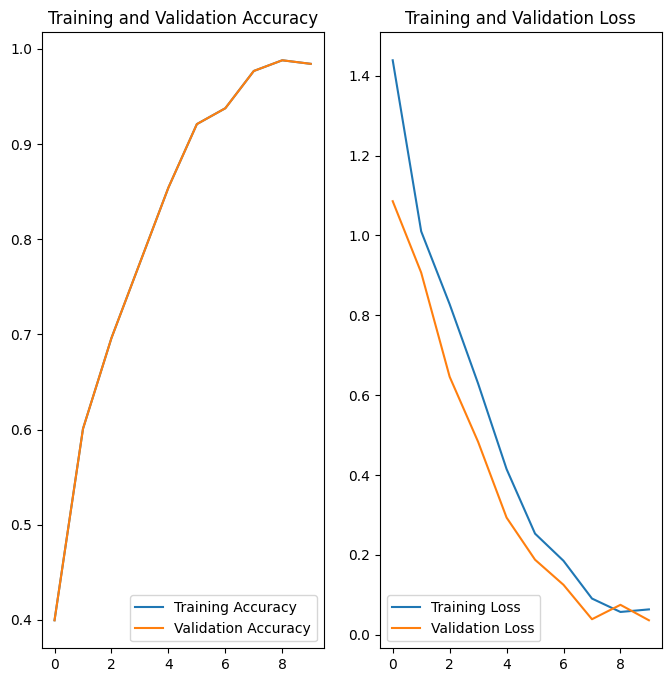

In [ ]:
acc: list[float] = history.history['accuracy']
val_acc: list[float] = history.history['val_accuracy']
loss: list[float] = history.history['loss']
val_loss: list[float] = history.history['val_loss']
epochs_range: range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

# ML #5 Дообучение нейроонной сети

1) Дообучение модели

In [ ]:
epochs: int = 20
history: keras.callbacks.History = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20
92/92 [==============================] - 156s 2s/step - loss: 1.3660 - accuracy: 0.4114 - val_loss: 1.0256 - val_accuracy: 0.5872
Epoch 2/20
92/92 [==============================] - 144s 2s/step - loss: 1.0203 - accuracy: 0.5971 - val_loss: 0.8793 - val_accuracy: 0.6727
Epoch 3/20
92/92 [==============================] - 157s 2s/step - loss: 0.8178 - accuracy: 0.6829 - val_loss: 0.6995 - val_accuracy: 0.7456
Epoch 4/20
92/92 [==============================] - 137s 1s/step - loss: 0.6282 - accuracy: 0.7742 - val_loss: 0.4030 - val_accuracy: 0.8842
Epoch 5/20
92/92 [==============================] - 131s 1s/step - loss: 0.3951 - accuracy: 0.8661 - val_loss: 0.2259 - val_accuracy: 0.9363
Epoch 6/20
92/92 [==============================] - 129s 1s/step - loss: 0.2083 - accuracy: 0.9366 - val_loss: 0.1437 - val_accuracy: 0.9680
Epoch 7/20
92/92 [==============================] - 116s 1s/step - loss: 0.1113 - accuracy: 0.9690 - val_loss: 0.0823 - val_accuracy: 0.9755
Epoch 8/20
92

2) Визуализация результатов обучения нейронной сети

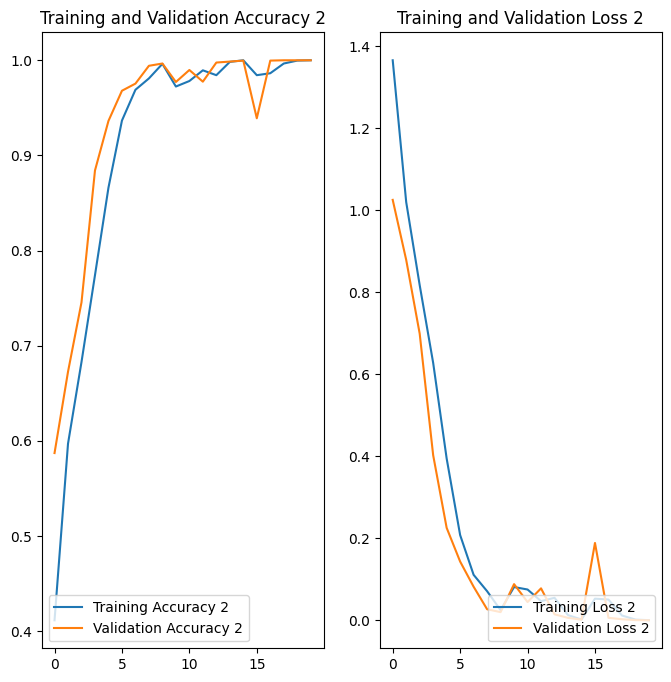

In [59]:
acc: list[float] = history.history['accuracy']
val_acc: list[float] = history.history['val_accuracy']
loss: list[float] = history.history['loss']
val_loss: list[float] = history.history['val_loss']
epochs_range: list[int] = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy 2')
plt.plot(epochs_range,val_acc, label='Validation Accuracy 2')
plt.legend(loc='lower left')
plt.title('Training and Validation Accuracy 2')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss 2')
plt.plot(epochs_range,val_loss, label='Validation Loss 2')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss 2')
plt.show()


3) Инференс модели

In [73]:
flower_url: str = "https://img.freepik.com/free-photo/beautiful-sunflowers-outdoors-still-life_23-2150152824.jpg"
flower_path: str = tf.keras.utils.get_file('new_sunflower', origin=flower_url)

img: PIL.JpegImagePlugin.JpegImageFile = tf.keras.utils.load_img(
    flower_path, target_size=(img_height, img_width)
)
img_array: np.ndarray = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions: np.ndarray = model.predict(img_array)
score: tf.Tensor = tf.nn.softmax(predictions[0])

print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))



1/1 [==============================] - 0s 31ms/step
На изображении скорее всего sunflowers (100.00% вероятность)


In [63]:
flower_url: str = "https://sad-i-ogorod.ru/upload/resize_cache/iblock/925/450_450_2/gsmp4srxi4w9jn1p8z8lb9sth7kqs87m.jpg"
flower_path: str = tf.keras.utils.get_file('flower', origin=flower_url)

img: PIL.JpegImagePlugin.JpegImageFile = tf.keras.utils.load_img(
    flower_path, target_size=(img_height, img_width)
)
img_array: np.ndarray = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions: np.ndarray = model.predict(img_array)
score: tf.Tensor = tf.nn.softmax(predictions[0])

print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))



1/1 [==============================] - 0s 46ms/step
На изображении скорее всего tulips (65.62% вероятность)


In [72]:

flower_url: str = "https://tvsamara.ru/media/news/2967-11072022.jpg"
flower_path: str = tf.keras.utils.get_file('first_daisy', origin=flower_url)

img: PIL.JpegImagePlugin.JpegImageFile = tf.keras.utils.load_img(
    flower_path, target_size=(img_height, img_width)
)
img_array: np.ndarray = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


predictions: np.ndarray = model.predict(img_array)
score: tf.Tensor = tf.nn.softmax(predictions[0])


print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))

1/1 [==============================] - 0s 34ms/step
На изображении скорее всего daisy (100.00% вероятность)


In [ ]:

flower_url: str = "https://zagorodnyy.ru/wp-content/uploads/2022/02/kustovie-zimostoikie-rozi-obraz-5-scaled.jpg"
flower_path: str = tf.keras.utils.get_file('strange_flowers', origin=flower_url)

img: PIL.JpegImagePlugin.JpegImageFile = tf.keras.utils.load_img(
    flower_path, target_size=(img_height, img_width)
)
img_array: np.ndarray = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


predictions: np.ndarray = model.predict(img_array)
score: tf.Tensor = tf.nn.softmax(predictions[0])


print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))

1/1 [==============================] - 0s 35ms/step
На изображении скорее всего roses (55.17% вероятность)


4) Сохранение модели локально

In [ ]:
from google.colab import files

model_file_name: str = "flowers_model.h5"
model.save(model_file_name)
files.download(model_file_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>